## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import scipy.stats as stats

In [2]:
antifungal = "Isavuconazole"
molar_mass = 437.47
date = "2023-01-19"
organism = "Candida albicans"

## Import layout

In [3]:
#source_plate = '../growth_curve_files/plate.xlsx'
source_plate = r"plan_isavu_prise2.xlsx"
plate_df = pd.read_excel(source_plate, header=0, index_col=0)
plate_df.head(3)

,strain,conc
well,,
A1,ERG11-DOX C.a,0.010
B1,ERG11-DOX C.a,0.010
A2,ERG11-DOX C.a,0.015


In [4]:
#importation of excel output from the TECAN
source_table1 = r"OD_isavu_CB_17-10-2022.xlsx"
source_df = pd.read_excel(source_table1, header=0, index_col=0)
source_df.head()

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,163761s,164661s,165561s,166461s,167362s,168262s,169162s,170062s,170962s,171862s
A1,0.12330,0.12313,0.12295,0.12298,0.12305,0.12317,0.12340,0.12353,0.12365,0.12395,...,1.11060,1.10980,1.11090,1.11120,1.1117,1.11210,1.11240,1.11280,1.11290,1.1133
B1,0.12765,0.12743,0.12745,0.12705,0.12705,0.12717,0.12732,0.12748,0.12750,0.12770,...,1.12540,1.12610,1.12580,1.12680,1.1268,1.12730,1.12720,1.12790,1.12840,1.1284
C1,0.12525,0.12473,0.12465,0.12443,0.12442,0.12450,0.12450,0.12483,0.12470,0.12485,...,0.86073,0.86245,0.86085,0.86265,0.8620,0.86380,0.86380,0.86395,0.86450,0.8647
D1,0.12620,0.12675,0.12653,0.12645,0.12615,0.12648,0.12640,0.12657,0.12668,0.12705,...,0.76550,0.76658,0.76612,0.76753,0.7691,0.77002,0.77018,0.77060,0.77153,0.7708
G1,0.12590,0.12623,0.12575,0.12560,0.12518,0.12543,0.12568,0.12565,0.12550,0.12557,...,1.15740,1.15770,1.15810,1.15660,1.1592,1.16020,1.16200,1.16070,1.16150,1.1622


In [5]:
#conversion of timepoints (s) -> (h)
rename_dict = {}

for col_name in source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
source_df.rename(columns = rename_dict, inplace=True)

source_df.head()

,0.000000,0.250000,0.500000,0.750000,1.000000,1.250278,1.500278,1.750278,2.000278,2.250278,...,45.489167,45.739167,45.989167,46.239167,46.489444,46.739444,46.989444,47.239444,47.489444,47.739444
A1,0.12330,0.12313,0.12295,0.12298,0.12305,0.12317,0.12340,0.12353,0.12365,0.12395,...,1.11060,1.10980,1.11090,1.11120,1.1117,1.11210,1.11240,1.11280,1.11290,1.1133
B1,0.12765,0.12743,0.12745,0.12705,0.12705,0.12717,0.12732,0.12748,0.12750,0.12770,...,1.12540,1.12610,1.12580,1.12680,1.1268,1.12730,1.12720,1.12790,1.12840,1.1284
C1,0.12525,0.12473,0.12465,0.12443,0.12442,0.12450,0.12450,0.12483,0.12470,0.12485,...,0.86073,0.86245,0.86085,0.86265,0.8620,0.86380,0.86380,0.86395,0.86450,0.8647
D1,0.12620,0.12675,0.12653,0.12645,0.12615,0.12648,0.12640,0.12657,0.12668,0.12705,...,0.76550,0.76658,0.76612,0.76753,0.7691,0.77002,0.77018,0.77060,0.77153,0.7708
G1,0.12590,0.12623,0.12575,0.12560,0.12518,0.12543,0.12568,0.12565,0.12550,0.12557,...,1.15740,1.15770,1.15810,1.15660,1.1592,1.16020,1.16200,1.16070,1.16150,1.1622


## Reshape (wide to long)

In [6]:
longdf = source_df.reset_index().rename(columns = {'index' : 'well'})
longdf = longdf.melt(id_vars = ['well'], var_name = 'time (h)', value_name = 'OD')
longdf

,well,time (h),OD
0,A1,0.0,0.12330
1,B1,0.0,0.12765
2,C1,0.0,0.12525
3,D1,0.0,0.12620
4,G1,0.0,0.12590
...,...,...,...
6907,B10,47.739444,1.01080
6908,A11,47.739444,0.95067
6909,B11,47.739444,1.02970
6910,A12,47.739444,0.77140


## Annotate dataframe with layout

In [7]:
merged_df = longdf.merge(right=plate_df, on=['well'])
merged_df.head(5)

,well,time (h),OD,strain,conc
0,A1,0.0,0.12330,ERG11-DOX C.a,0.01
1,A1,0.25,0.12313,ERG11-DOX C.a,0.01
2,A1,0.5,0.12295,ERG11-DOX C.a,0.01
3,A1,0.75,0.12298,ERG11-DOX C.a,0.01
4,A1,1.0,0.12305,ERG11-DOX C.a,0.01


## Visualization (example)

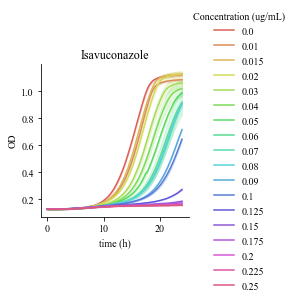

In [52]:
grid = sns.FacetGrid(data=merged_df[merged_df['time (h)'] <=24], hue='conc', palette='hls')
grid.map(sns.lineplot, 'time (h)', 'OD')
#grid.set_titles(col_template='{col_name}')
grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = 'Concentration (ug/mL)')
grid.fig.subplots_adjust(top=0.9)
plt.title(antifungal)
axes = grid.axes.flatten()
title = "GC_" + antifungal + "_" + organism + "_" + date
plt.savefig(title, format='png', dpi=300)
#plt.savefig('../growth_curve_files/graphs/mica_40h.png', format='png', dpi=300)

## Calculate area under the curve (AUC)

In [8]:
def get_auc(g):
    return np.trapz(g.OD)

In [9]:
aucdf = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_auc).reset_index(name='auc')
condensed_df = plate_df.merge(right=aucdf, on=['well'])
condensed_df.head(3)

,well,strain,conc,auc
0,A1,ERG11-DOX C.a,0.010,44.308090
1,B1,ERG11-DOX C.a,0.010,44.695145
2,A2,ERG11-DOX C.a,0.015,45.649445


## Calculate derivative growth rate (DGR)

In [10]:
def get_derivative_growth_rate(g):
    # rate is multiplied by 4 to convert from /15min (measurements every 15 min) to /h
    data_diff = g.OD.diff()*4
    get_top_5 = data_diff.nlargest(5)    
    growth_rate = np.median(get_top_5)
    return growth_rate

In [11]:
dgr = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_derivative_growth_rate).reset_index(name='dgr')
condensed_df = plate_df.merge(right=dgr, on=['well'])
condensed_df.head(3)

,well,strain,conc,dgr
0,A1,ERG11-DOX C.a,0.010,0.15408
1,B1,ERG11-DOX C.a,0.010,0.15920
2,A2,ERG11-DOX C.a,0.015,0.15152


## Convert concentrations (ug/mL -> uM)

In [12]:
def convert_to_uM(ug, mass_mol):
    # a simple function to convert ug/ml to uM with the molecular weigth of the compound
    vol = 0.001
    uM = (((ug*10**-6)/(vol*mass_mol))*10**6)
    return uM

In [13]:

condensed_df['concentration_uM'] = condensed_df['conc'].apply(lambda x: convert_to_uM(x, molar_mass))
condensed_df

,well,strain,conc,dgr,concentration_uM
0,A1,ERG11-DOX C.a,0.010,0.15408,0.022859
1,B1,ERG11-DOX C.a,0.010,0.15920,0.022859
2,A2,ERG11-DOX C.a,0.015,0.15152,0.034288
3,B2,ERG11-DOX C.a,0.015,0.15512,0.034288
4,A3,ERG11-DOX C.a,0.020,0.15080,0.045717
5,B3,ERG11-DOX C.a,0.020,0.15612,0.045717
6,A4,ERG11-DOX C.a,0.030,0.13400,0.068576
7,B4,ERG11-DOX C.a,0.030,0.14416,0.068576
8,A5,ERG11-DOX C.a,0.040,0.11848,0.091435
9,B5,ERG11-DOX C.a,0.040,0.13908,0.091435


## Convert concentrations (uM -> ug/mL)

In [14]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

## Calculate inhibition coefficient

In [15]:
# Setting the value to be used to calculate the inhibition coefficient
# Either derivative growth rate (fitness_type = 'dgr')
# or normalized AUC parameter (fitness_type = 'norm_auc')
if 'dgr' in condensed_df.columns.tolist():
    fitness_type = 'dgr'
elif 'auc' in condensed_df.columns.tolist():
    fitness_type = 'norm_auc'
else:
    print('Fitness has not been calculated')

In [16]:
def get_inhib_coeff(df, fitness, fitness_type):
    # Inhibition coefficient is calculated either from the derivative growth rate (fitness_type = 'dgr')
    # or the normalized AUC parameter (fitness_type = 'norm_auc')
    ref = df.loc[(df.concentration_uM==0), 'dgr'].mean()
    return (ref - fitness)/ref

In [17]:
condensed_df['inhib_coeff'] = condensed_df['dgr'].apply(lambda x: get_inhib_coeff(condensed_df, x, 'dgr'))
condensed_df.head(3)

,well,strain,conc,dgr,concentration_uM,inhib_coeff
0,A1,ERG11-DOX C.a,0.010,0.15408,0.022859,-0.023243
1,B1,ERG11-DOX C.a,0.010,0.15920,0.022859,-0.057245
2,A2,ERG11-DOX C.a,0.015,0.15152,0.034288,-0.006243


## Hill equation + fitting

In [18]:
#fit_data = condensed_df[(condensed_df.strain=='LL13-040') & (condensed_df.genotype=='WT') & (condensed_df.concentration_uM!=0) & (condensed_df.concentration_uM<50)][['concentration_uM','replicate','inhib_coeff']]
fit_data = condensed_df[(condensed_df.concentration_uM!=0)].groupby(['concentration_uM'])[['inhib_coeff']].mean().reset_index()
fit_data

,concentration_uM,inhib_coeff
0,0.022859,-0.040244
1,0.034288,-0.018196
2,0.045717,-0.019126
3,0.068576,0.076371
4,0.091435,0.144774
5,0.114294,0.179838
6,0.137152,0.195511
7,0.160011,0.190729
8,0.182870,0.186877
9,0.205728,0.235755


In [19]:
wt_conc = fit_data.concentration_uM.values
wt_inhib = fit_data.inhib_coeff.values

In [20]:
print(wt_conc)
print(wt_inhib)

[0.02285871 0.03428807 0.04571742 0.06857613 0.09143484 0.11429355
 0.13715226 0.16001097 0.18286968 0.20572839 0.2285871  0.28573388
 0.34288065 0.40002743 0.45717421 0.51432098 0.57146776]
[-0.04024439 -0.01819631 -0.01912605  0.07637136  0.14477354  0.17983796
  0.19551069  0.19072918  0.18687741  0.23575508  0.27586665  0.79917652
  0.95590384  0.97277195  0.97463143  0.97622526  0.97502988]


In [21]:
def hill_equation(x, E, n):
    # this function defines the hill equation, where:
    # x is the drug concentration
    # E is the concentration with half effect (IC50)
    # n is the hill coefficient,
    
    return 1/(1+((E/x)**n))

In [22]:
import scipy as sci

# Get best fit parameters (popt) and covariance matrix (pcov)
popt, pcov = sci.optimize.curve_fit(hill_equation, wt_conc, wt_inhib, p0=[0.25,5])
print(popt)
print(pcov)

[0.24201938 5.6662227 ]
[[ 8.66694231e-05 -1.63568215e-03]
 [-1.63568215e-03  1.07970466e+00]]


In [23]:
pcov[1] = pcov[1]*-1
pcov[0,1] = pcov[0,1]*-1
pcov

array([[ 8.66694231e-05,  1.63568215e-03],
       [ 1.63568215e-03, -1.07970466e+00]])

In [24]:
def get_IC(v, E, n):
    # This function calculates ICv based on IC50 (E) and hill coefficient (n) for any v value between 0 and 1
    return E*((v/(1-v))**(1/n))

In [25]:
ic50_mol = round(get_IC(0.5,popt[0],popt[1]),2)
#This value should be equal to popt[0]
print('IC50 = {} uM'.format(ic50_mol))
ic75_mol = round(get_IC(0.75,popt[0],popt[1]),2)
print('IC75 = {} uM'.format(ic75_mol))

IC50 = 0.24 uM
IC75 = 0.29 uM


In [26]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

In [27]:
ic50 = convert_to_ug(ic50_mol, molar_mass)
ic50

0.1049928

In [28]:
dof = np.size(wt_inhib) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)
ci_cy = tval*np.sqrt(pcov)[0]
# this little snippet of code allows to calculate the 95% confidence interval on both parameters.
# based on this, we would have IC50 = 9.26 uM +/- 1.18 and hill_coeff = 0.749 +/- 0.019

ci_cy

C:\Users\camil\AppData\Local\Temp/ipykernel_9760/2360888004.py:5: RuntimeWarning: invalid value encountered in sqrt
  ci_cy = tval*np.sqrt(pcov)[0]


array([0.01973556, 0.08573653])

In [29]:
interval = convert_to_ug(ci_cy[0], molar_mass)
interval

0.008633714623208525

In [30]:
# now we'll want to plot our curve on top of the data. However, since we'll be plotting on both linear and log
# axis, we need to choose x coordinates across our range of concentrations that are not log-distributed and not 
# linearly distributed
fit_vals = np.logspace(np.log2(wt_conc.min()),np.log2(wt_conc.max()), num=50, base=2)

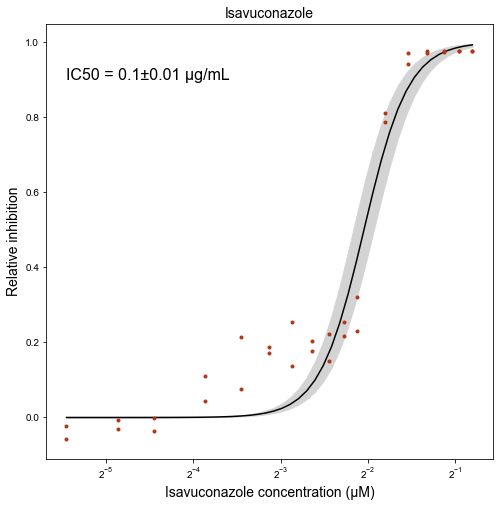

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(8,8))


plt.plot(condensed_df['concentration_uM'],condensed_df['inhib_coeff'], color='#B03616', 
         marker='o', ms=3, linestyle='None', zorder=9)

plt.plot(fit_vals, [hill_equation(x,popt[0], popt[1]) for x in fit_vals], 'k')


plt.fill_between(fit_vals, [hill_equation(x,popt[0]+ci_cy[0], popt[1]-ci_cy[1]) for x in fit_vals],
                 [hill_equation(x,popt[0]-ci_cy[0], popt[1]+ci_cy[1]) for x in fit_vals], color='lightgrey')

plt.xscale('log',base=2)

text = "IC50 = " + str(round(ic50,2)) + "\u00B1" + str(round(interval,2)) +" μg/mL"
#text = "\nou " + str(round(ic50_mol,2)) + "\u00B1" + str(round(ci_cy[0],2)) + " $\mu$M\n" + "\nCoefficient de Hill = " + str(round(popt[1],2)) + "\u00B1" + str(round(ci_cy[1],2))+ "\n\nBasé sur le\ntaux de croissance dérivé\naprès 24h"
plt.text(wt_conc.min(), 0.9, text, fontsize=16) 

plt.xlabel(antifungal + " concentration (μM)", fontsize=14)
plt.ylabel('Relative inhibition', fontsize=14)
plt.title(antifungal, fontsize=14)

plt.rcParams['svg.fonttype'] = 'none'
name = "Dose-response_curve_" + antifungal + "_"+ organism + "24H" + "_" + date
plt.savefig(f"c:{name}.png", format='png', dpi=300)
plt.savefig(f"c:{name}.svg", format='svg', dpi=300)